In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# DATA PREPROCESSING

### Importing Datasets

In [11]:
df_train=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Priyanshu\Externship\Datasets\Engine Failure Prediction\PM_train.txt",sep=' ',header=None).drop([26,27],axis=1)
col_names = ['engine_id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
df_train.columns=col_names
df_train.head()

engine_id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0        ,1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1       0,1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2       1,1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3       2,1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4       3,1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   

        s4     s5  ...     s12      s13      s14     s15   s16  s17   s18  \
0  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388   
1  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388   
2  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388   
3  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388   
4  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388   

     s19    s20      s21  
0  100.0  39.06  23.4190  
1  100.0  39.00  23.4236  
2  100.0  38.95  23.3442  
3  100.0  38.88  23.3739  
4  100.0  38.90  23.4044  

[5 rows x 26 columns]

In [12]:
df_train['engine_id'] = df_train['engine_id'].apply(lambda x: x.split(',')[-1]) # cleaning the id column
print('Shape:',df_train.shape)
print(df_train.info())
df_train.head(3)
# Training data: It is the aircraft engine run-to-failure data.

Shape: (20631, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine_id  20631 non-null  object 
 1   cycle      20631 non-null  int64  
 2   setting1   20631 non-null  float64
 3   setting2   20631 non-null  float64
 4   setting3   20631 non-null  float64
 5   s1         20631 non-null  float64
 6   s2         20631 non-null  float64
 7   s3         20631 non-null  float64
 8   s4         20631 non-null  float64
 9   s5         20631 non-null  float64
 10  s6         20631 non-null  float64
 11  s7         20631 non-null  float64
 12  s8         20631 non-null  float64
 13  s9         20631 non-null  float64
 14  s10        20631 non-null  float64
 15  s11        20631 non-null  float64
 16  s12        20631 non-null  float64
 17  s13        20631 non-null  float64
 18  s14        20631 non-null  float64
 19  s15        20631 non-null  

engine_id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0         1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1         1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2         1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   

        s4     s5  ...     s12      s13      s14     s15   s16  s17   s18  \
0  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388   
1  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388   
2  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388   

     s19    s20      s21  
0  100.0  39.06  23.4190  
1  100.0  39.00  23.4236  
2  100.0  38.95  23.3442  

[3 rows x 26 columns]

In [13]:
df_test=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Priyanshu\Externship\Datasets\Engine Failure Prediction\PM_test.txt",sep=' ',header=None).drop([26,27],axis=1)
col_names = ['engine_id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
df_test.columns=col_names
print(df_test.info())
print('Shape:',df_test.shape)
(df_test.head())
# Testing data: It is the aircraft engine operating data without failure events recorded.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine_id  13096 non-null  int64  
 1   cycle      13096 non-null  int64  
 2   setting1   13096 non-null  float64
 3   setting2   13096 non-null  float64
 4   setting3   13096 non-null  float64
 5   s1         13096 non-null  float64
 6   s2         13096 non-null  float64
 7   s3         13096 non-null  float64
 8   s4         13096 non-null  float64
 9   s5         13096 non-null  float64
 10  s6         13096 non-null  float64
 11  s7         13096 non-null  float64
 12  s8         13096 non-null  float64
 13  s9         13096 non-null  float64
 14  s10        13096 non-null  float64
 15  s11        13096 non-null  float64
 16  s12        13096 non-null  float64
 17  s13        13096 non-null  float64
 18  s14        13096 non-null  float64
 19  s15        13096 non-null  float64
 20  s16   

engine_id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0          1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29   
1          1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45   
2          1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94   
3          1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12   
4          1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19   

        s4     s5  ...     s12      s13      s14     s15   s16  s17   s18  \
0  1398.21  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03  392  2388   
1  1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03  393  2388   
2  1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03  393  2388   
3  1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03  391  2388   
4  1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03  390  2388   

     s19    s20      s21  
0  100.0  38.86  23.3735  
1  100.0  39.02  23.3916  
2  100.0  39.08  23.4166  
3  100.0  39.00  23.3737  
4  100.0  38.99  23.4130  

[5 rows x 26 columns]

In [14]:
df_truth=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Priyanshu\Externship\Datasets\Engine Failure Prediction\PM_truth.txt",sep=' ',header=None).drop([1],axis=1)
df_truth.columns=['rem_cycles'] # remaining cycles
df_truth['engine_id']=df_truth.index+1
print('Shape:',df_truth.shape)
print(df_truth.info())
df_truth.head()
# truth data: It contains the information of true remaining cycles for each engine in the testing data.

Shape: (100, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   rem_cycles  100 non-null    int64
 1   engine_id   100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB
None


rem_cycles  engine_id
0         112          1
1          98          2
2          69          3
3          82          4
4          91          5

In [6]:
df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')
df_truth.to_csv('df_true.csv')

### PRE PROCESS THE DATASET

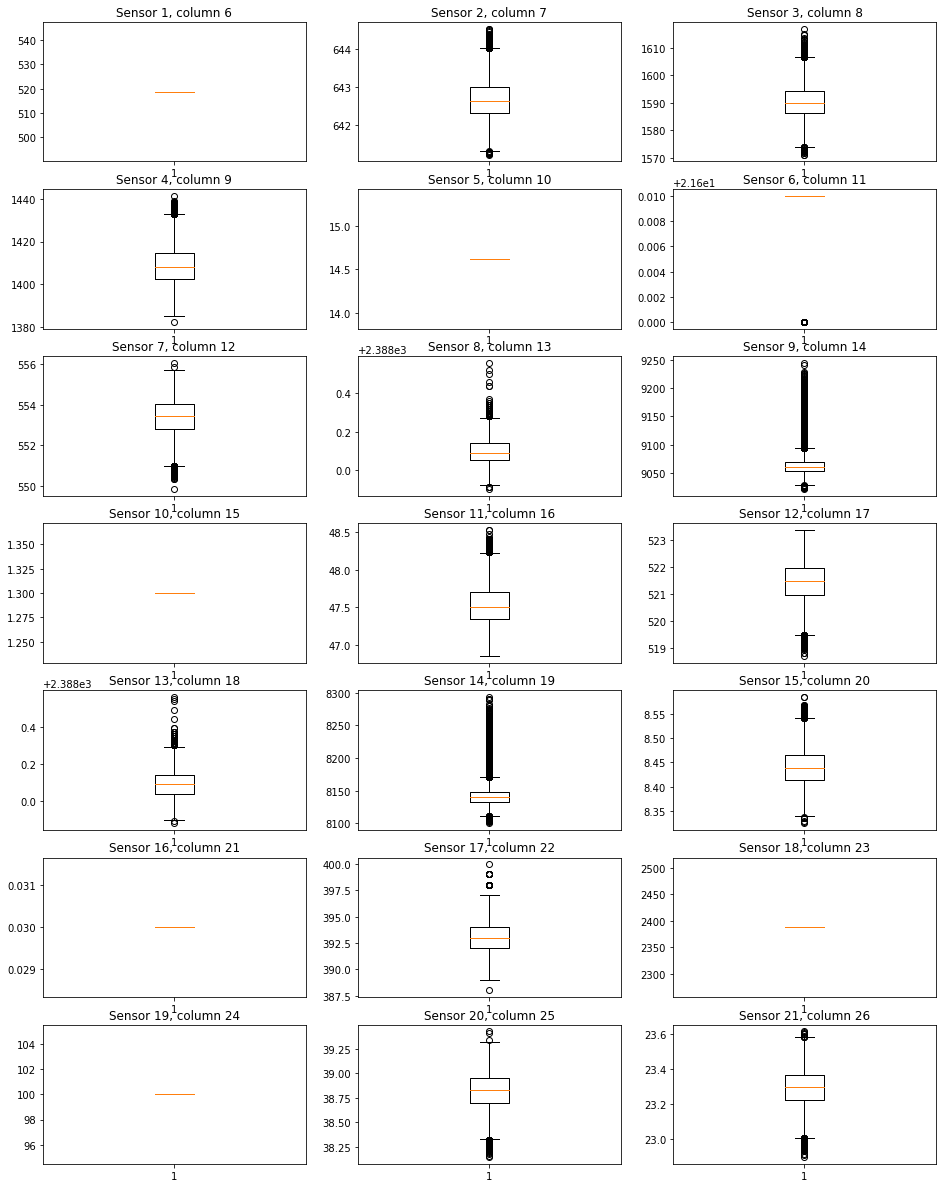

In [35]:
#Boxplots of sensor data
plt.figure(figsize = (16, 21))
for i in range(21):
    temp_data = df_train.iloc[:,i+5]
    plt.subplot(7,3,i+1)
    plt.boxplot(temp_data)
    plt.title("Sensor " + str(i+1) + ", column "+ str(i+6))
plt.show()

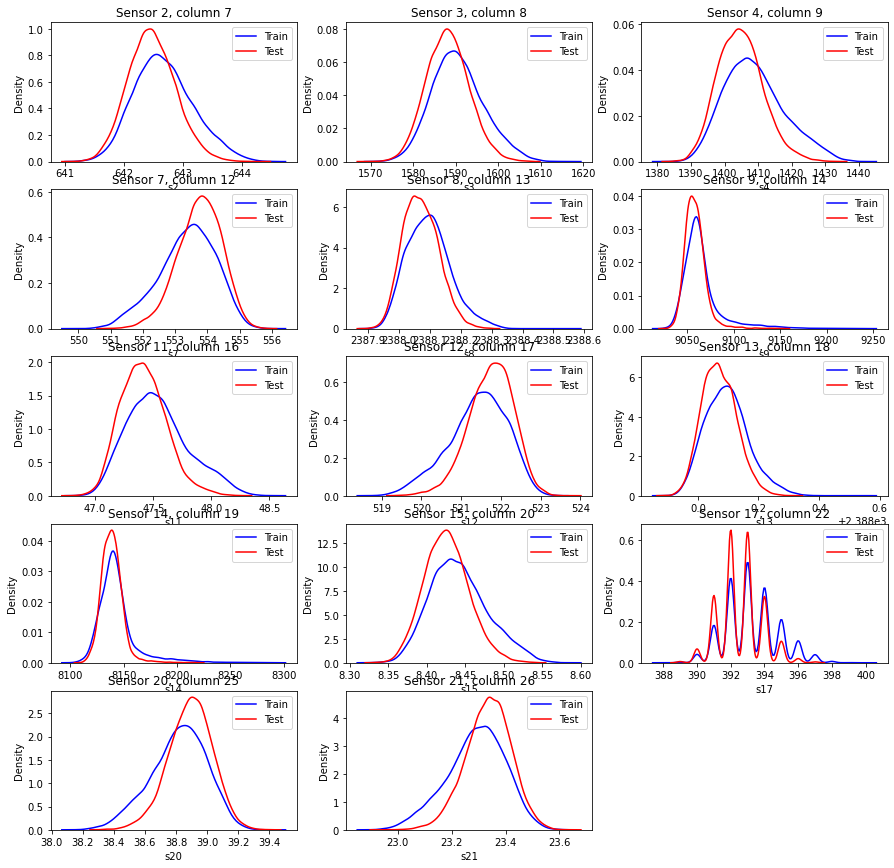

In [36]:
# comparision of train and test data
plt.figure(figsize = (15, 21))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]):
    temp_train = df_train.iloc[:, j]
    temp_test = df_test.iloc[:, j]
    plt.subplot(7,3, i+1)
    sns.kdeplot(temp_train, legend = False, color = "blue", label = "Train")
    sns.kdeplot(temp_test, legend = False, color = "red", label = "Test")
    plt.title("Sensor " + str(j-4) + ", column "+ str(j+1))
    plt.legend()
plt.show()

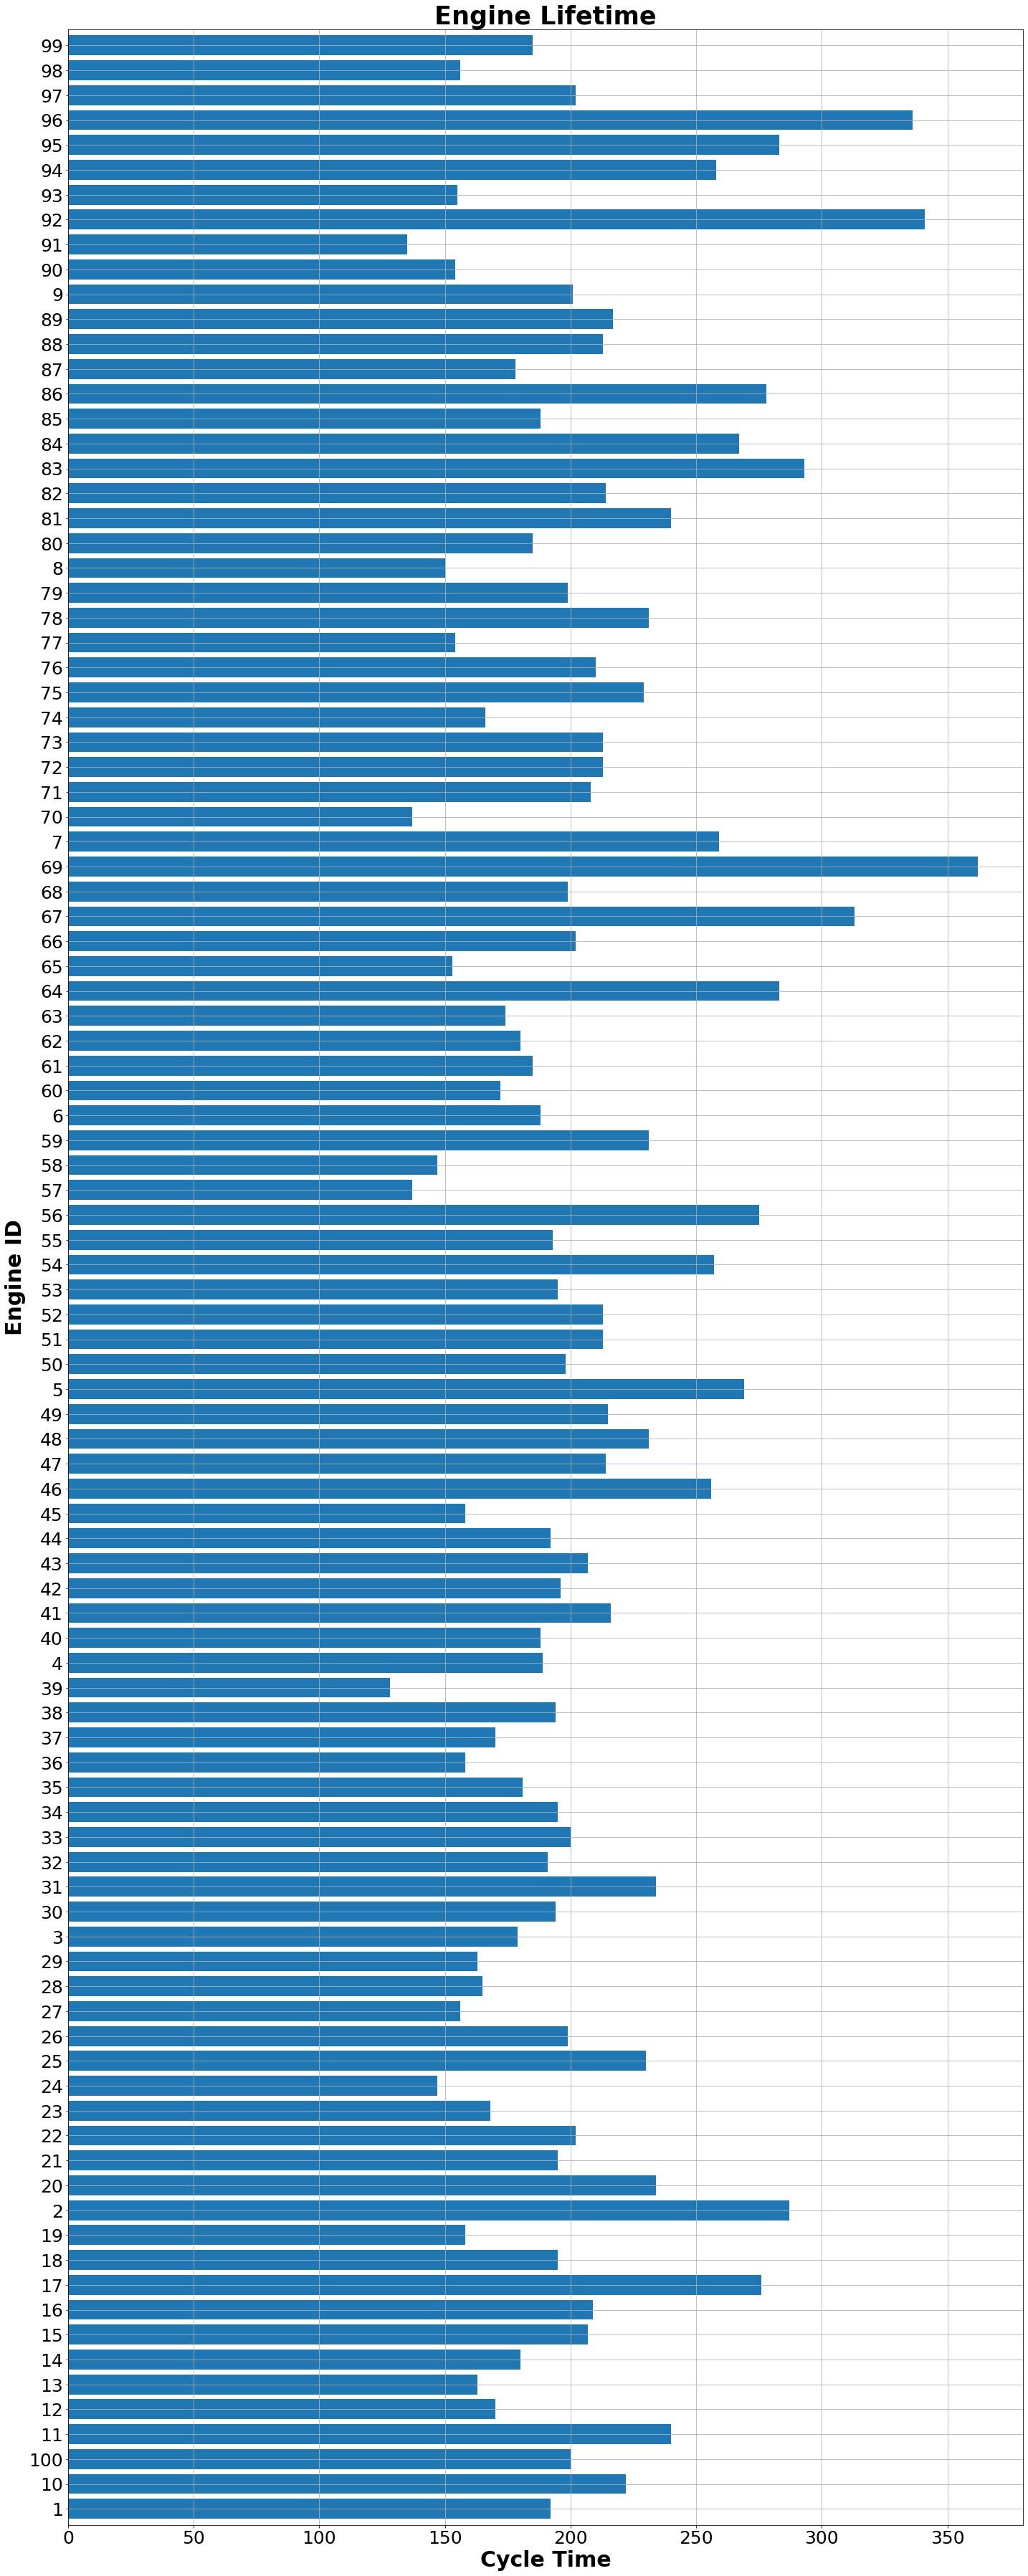

In [7]:
#plt.style.use('dark_background')
plt.figure(figsize=(20,50))
ax = df_train.groupby('engine_id')['cycle'].max().plot(kind='barh',width=0.8,stacked = True, align = 'center', rot = 0)
plt.title("Engine Lifetime", fontweight = 'bold', size = 35)
plt.xlabel('Cycle Time', fontweight='bold',size=30)
plt.xticks(size=25)
plt.ylabel('Engine ID',fontweight='bold',size=30)
plt.yticks(size=25)
plt.grid(True)
plt.tight_layout(True)
plt.show()

In [15]:
df_train.engine_id.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100'],
      dtype=object)

In [15]:
rul=pd.DataFrame(df_test.groupby('engine_id')['cycle'].max()).reset_index()
cols=['engine_id','max_cycles'] # maximum number of cycles performed by each engine
rul.columns=cols
print('Shape:',rul.shape)
rul

Shape: (100, 2)


engine_id  max_cycles
0           1          31
1           2          49
2           3         126
3           4         106
4           5          98
..        ...         ...
95         96          97
96         97         134
97         98         121
98         99          97
99        100         198

[100 rows x 2 columns]

Now rul and truth data have same dimensions

In [16]:
# calculating remaining time for failure for each engine
df_truth['rtf']=df_truth['rem_cycles']+rul['max_cycles']
print('Shape:',df_truth.shape)
df_truth.head()

Shape: (100, 3)


rem_cycles  engine_id  rtf
0         112          1  143
1          98          2  147
2          69          3  195
3          82          4  188
4          91          5  189

In [17]:
df_truth.drop('rem_cycles', axis=1, inplace=True)
df_test=df_test.merge(df_truth,on=['engine_id'],how='left')
df_test['ttf']=df_test['rtf'] - df_test['cycle']
df_test.drop('rtf', axis=1, inplace=True)
print('Shape:',df_test.shape)
df_test.head()

Shape: (13096, 27)


engine_id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0          1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29   
1          1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45   
2          1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94   
3          1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12   
4          1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19   

        s4     s5  ...      s13      s14     s15   s16  s17   s18    s19  \
0  1398.21  14.62  ...  2388.03  8125.55  8.4052  0.03  392  2388  100.0   
1  1395.42  14.62  ...  2388.06  8139.62  8.3803  0.03  393  2388  100.0   
2  1401.34  14.62  ...  2388.03  8130.10  8.4441  0.03  393  2388  100.0   
3  1406.42  14.62  ...  2388.05  8132.90  8.3917  0.03  391  2388  100.0   
4  1401.92  14.62  ...  2388.03  8129.54  8.4031  0.03  390  2388  100.0   

     s20      s21  ttf  
0  38.86  23.3735  142  
1  39.02  23.3916  141  
2  39.08  23.4166  140  
3  39.00  23.3737  139  
4  38.99  23.4130  138  

[5 rows x 27 columns]

In [18]:
df_train['ttf'] = df_train.groupby(['engine_id'])['cycle'].transform(max)-df_train['cycle']
print('Shape:',df_train.shape)
df_train.head()

Shape: (20631, 27)


engine_id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0         1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1         1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2         1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3         1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4         1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   

        s4     s5  ...      s13      s14     s15   s16  s17   s18    s19  \
0  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  ttf  
0  39.06  23.4190  191  
1  39.00  23.4236  190  
2  38.95  23.3442  189  
3  38.88  23.3739  188  
4  38.90  23.4044  187  

[5 rows x 27 columns]

In [19]:
df_train.ttf.value_counts()

0      100
123    100
121    100
89     100
73     100
      ... 
341      1
356      1
355      1
354      1
351      1
Name: ttf, Length: 362, dtype: int64

### Calculating Time to Failure

In [20]:
dfn_train=df_train.copy() # new train data
dfn_test=df_test.copy() # new test data
period=30 # threshold
dfn_train['label_bc'] = dfn_train['ttf'].apply(lambda x: 1 if x <= period else 0)
dfn_test['label_bc'] = dfn_test['ttf'].apply(lambda x: 1 if x <= period else 0)
print('For train data-')
print('min ttf:',dfn_train.ttf.min())
print('max ttf:',dfn_train.ttf.max())
print('mean ttf:',dfn_train.ttf.mean())
dfn_train.head()

For train data-
min ttf: 0
max ttf: 361
mean ttf: 107.80786195530997


engine_id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0         1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1         1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2         1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3         1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4         1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   

        s4     s5  ...      s14     s15   s16  s17   s18    s19    s20  \
0  1400.60  14.62  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  1403.14  14.62  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  1404.20  14.62  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  1401.87  14.62  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  1406.22  14.62  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90   

       s21  ttf  label_bc  
0  23.4190  191         0  
1  23.4236  190         0  
2  23.3442  189         0  
3  23.3739  188         0  
4  23.4044  187         0  

[5 rows x 28 columns]

In [21]:
dfn_train.label_bc.value_counts()

0    17531
1     3100
Name: label_bc, dtype: int64

### Feature Scaling

In [22]:
features_col_name=['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
                   's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
target_col_name='label_bc'
sc=MinMaxScaler()
dfn_train[features_col_name]=sc.fit_transform(dfn_train[features_col_name])
dfn_test[features_col_name]=sc.transform(dfn_test[features_col_name])
dfn_train.head()

engine_id  cycle  setting1  setting2  setting3   s1        s2        s3  \
0         1      1  0.459770  0.166667       0.0  0.0  0.183735  0.406802   
1         1      2  0.609195  0.250000       0.0  0.0  0.283133  0.453019   
2         1      3  0.252874  0.750000       0.0  0.0  0.343373  0.369523   
3         1      4  0.540230  0.500000       0.0  0.0  0.343373  0.256159   
4         1      5  0.390805  0.333333       0.0  0.0  0.349398  0.257467   

         s4   s5  ...       s14       s15  s16       s17  s18  s19       s20  \
0  0.309757  0.0  ...  0.199608  0.363986  0.0  0.333333  0.0  0.0  0.713178   
1  0.352633  0.0  ...  0.162813  0.411312  0.0  0.333333  0.0  0.0  0.666667   
2  0.370527  0.0  ...  0.171793  0.357445  0.0  0.166667  0.0  0.0  0.627907   
3  0.331195  0.0  ...  0.174889  0.166603  0.0  0.333333  0.0  0.0  0.573643   
4  0.404625  0.0  ...  0.174734  0.402078  0.0  0.416667  0.0  0.0  0.589147   

        s21  ttf  label_bc  
0  0.724662  191         0  
1  0.731014  190         0  
2  0.621375  189         0  
3  0.662386  188         0  
4  0.704502  187         0  

[5 rows x 28 columns]

[]

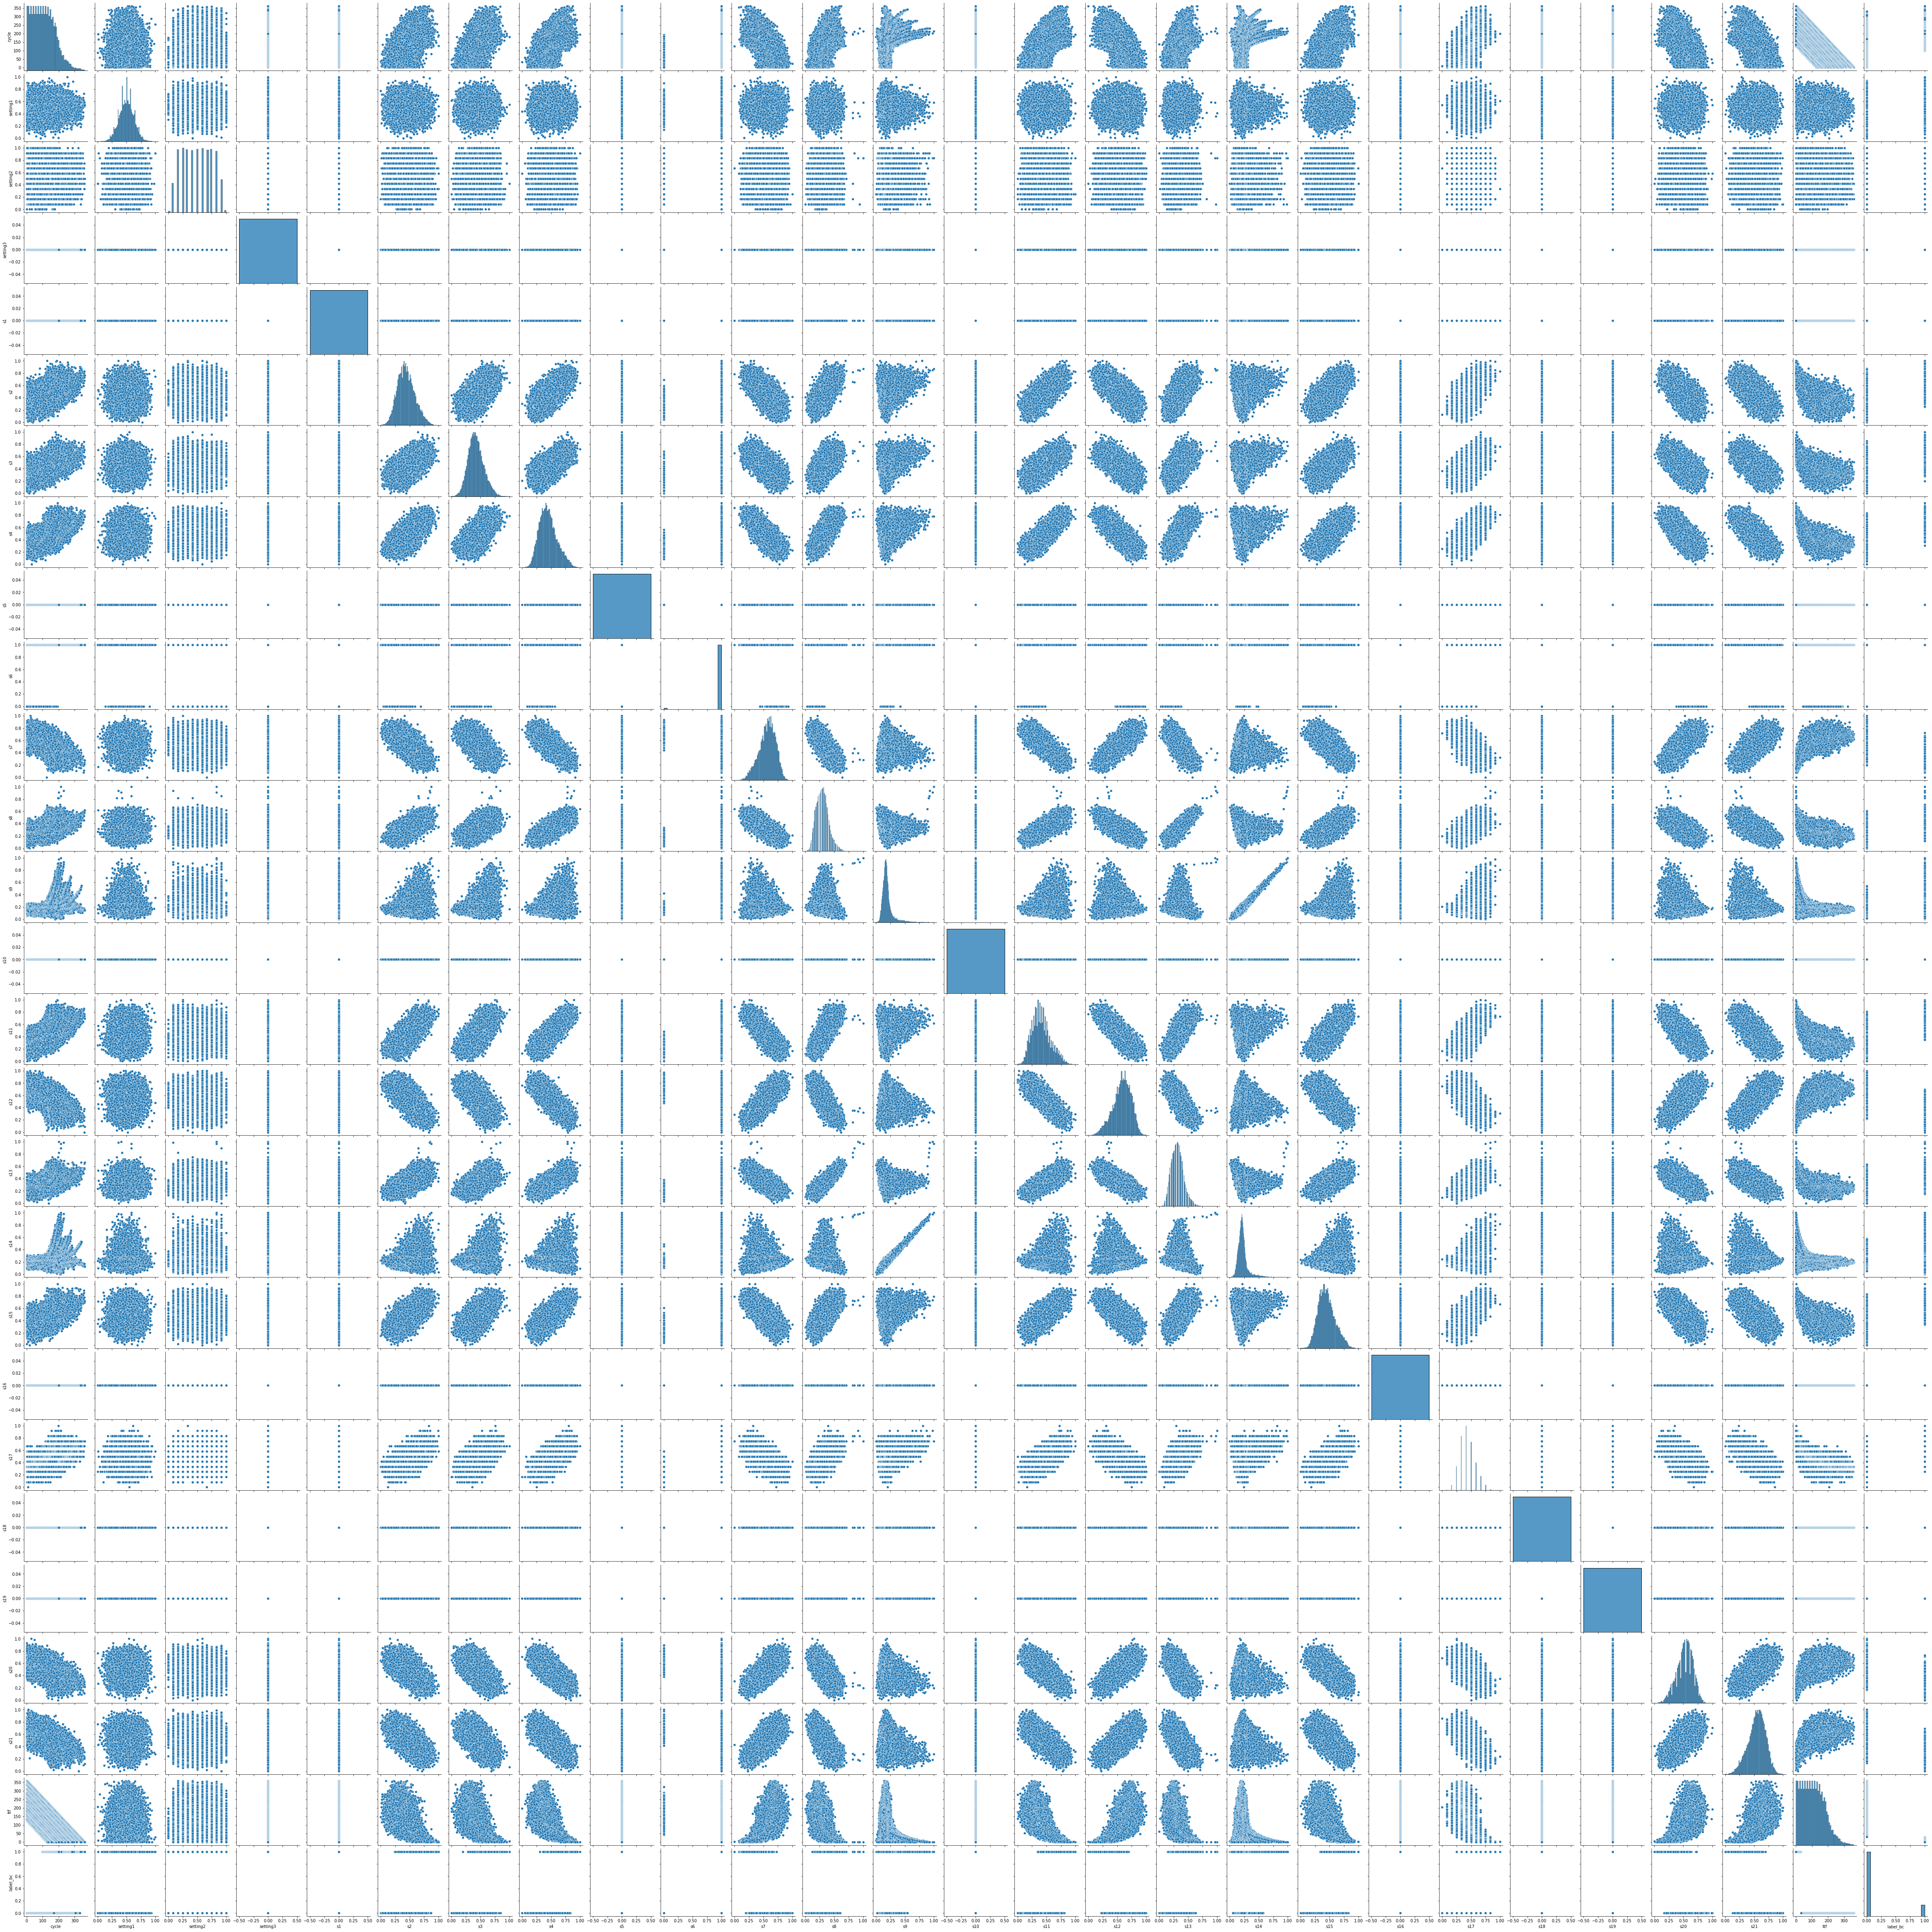

In [15]:
sns.pairplot(dfn_train)
plt.plot()
# Plotting pairwise relationships in a dataset.

### Splitting dependent and independent variables

In [23]:
x_train = dfn_train.iloc[:,:-1].values
y_train = dfn_train.iloc[:,-1:].values

In [24]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [25]:
x_test = dfn_test.iloc[:,:-1].values
y_test = dfn_test.iloc[:,-1:].values

# Model Building

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Hyperparameter Tuning

In [27]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'criterion': ['gini','entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10],
            'solver': ['sag', 'saga','lbfgs']
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [2,5,7]
        }
    }
}

In [30]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

model  best_score                   best_params
0                   svm    1.000000  {'C': 1, 'kernel': 'linear'}
1         random_forest    1.000000         {'criterion': 'gini'}
2   logistic_regression    0.998740   {'C': 1, 'solver': 'lbfgs'}
3  naive_bayes_gaussian    0.937909                            {}
4         decision_tree    1.000000         {'criterion': 'gini'}
5                   KNN    0.975910            {'n_neighbors': 7}

### Fitting Model

In [28]:
model=LogisticRegression(C=1,solver='lbfgs')
model.fit(x_train,y_train)

LogisticRegression(C=1)

In [29]:
y_pred=model.predict(x_test)

### Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9993891264508247

In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0006108735491753207
MSE: 0.0006108735491753207
RMSE: 0.024715856229864275


In [32]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[12763,     1],
       [    7,   325]], dtype=int64)

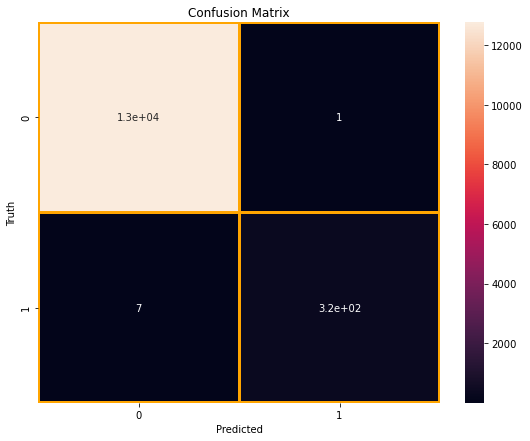

In [33]:
plt.figure(figsize=(9,7))
sns.heatmap(cm,annot=True,linewidths=2,linecolor='orange')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

### Saving Model

In [36]:
import joblib
joblib.dump(model, "engine_model.sav")

['engine_model.sav']

In [37]:
joblib.dump(sc,'MinMax.sav')

['MinMax.sav']